##### Importações

In [97]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [79]:
df = pd.read_csv("../data/processed/processed_cybersecurity_intrusion_data.csv")
df_um = pd.read_csv("../data/transformed/transformed_cybersecurity_intrusion_data.csv")

In [80]:
df.columns

Index(['ohe__protocol_type_ICMP', 'ohe__protocol_type_TCP',
       'ohe__protocol_type_UDP', 'ohe__browser_type_Chrome',
       'ohe__browser_type_Edge', 'ohe__browser_type_Firefox',
       'ohe__browser_type_Safari', 'ohe__protocol_encrypt_ICMP_AES',
       'ohe__protocol_encrypt_ICMP_DES', 'ohe__protocol_encrypt_TCP_AES',
       'ohe__protocol_encrypt_TCP_DES', 'ohe__protocol_encrypt_UDP_AES',
       'ohe__protocol_encrypt_UDP_DES', 'remainder__network_packet_size',
       'remainder__login_attempts', 'remainder__session_duration',
       'remainder__encryption_used', 'remainder__ip_reputation_score',
       'remainder__failed_logins', 'remainder__unusual_time_access',
       'remainder__attack_detected', 'remainder__long_session',
       'remainder__large_packet', 'remainder__risk_score', 'outlier_flag'],
      dtype='object')

##### Pré-Processamento

In [81]:
print(f"Shape do dataset: {df.shape}")
print(f"\nDistribuição da target:\n", df['remainder__attack_detected'].value_counts(normalize=True))

Shape do dataset: (7174, 25)

Distribuição da target:
 remainder__attack_detected
0.0    0.573181
1.0    0.426819
Name: proportion, dtype: float64


In [82]:
X = df.drop(['remainder__attack_detected', 'outlier_flag'], axis=1)
y = df['remainder__attack_detected']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=115, stratify=y)

In [84]:
print(f"Shape treino: {X_train.shape}")
print(f"Shape teste: {X_test.shape}") 

Shape treino: (5739, 23)
Shape teste: (1435, 23)


##### Definição de Scalers e Modelos

In [85]:
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
}

In [86]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'RandomForest': RandomForestClassifier(class_weight='balanced'),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVC': SVC(probability=True, class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'XGB': XGBClassifier()
}

##### Treinamento e Avaliação

In [87]:
results = []

for scaler_name, scaler in scalers.items():
    for model_name, model in models.items():
        pipeline = Pipeline([
            ('scaler', scaler),
            ('model', model)
        ])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        
        try:
            y_proba = pipeline.predict_proba(X_test)[:,1]
            roc = roc_auc_score(y_test, y_proba)
        except:
            roc = np.nan
        
        results.append({
            'Scaler': scaler_name,
            'Model': model_name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted'),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1': f1_score(y_test, y_pred, average='weighted'),
            'ROC_AUC': roc
        })

results_df = pd.DataFrame(results).sort_values(by='F1', ascending=False)
display(results_df)

,Scaler,Model,Accuracy,Precision,Recall,F1,ROC_AUC
8,MinMaxScaler,GradientBoosting,0.882927,0.902774,0.882927,0.879035,0.872804
2,StandardScaler,GradientBoosting,0.882927,0.902774,0.882927,0.879035,0.873046
14,RobustScaler,GradientBoosting,0.882927,0.902774,0.882927,0.879035,0.873028
7,MinMaxScaler,RandomForest,0.881533,0.899555,0.881533,0.877805,0.865472
13,RobustScaler,RandomForest,0.877352,0.893913,0.877352,0.873634,0.867792
1,StandardScaler,RandomForest,0.875958,0.892389,0.875958,0.872198,0.862805
11,MinMaxScaler,XGB,0.872474,0.885934,0.872474,0.868998,0.870667
17,RobustScaler,XGB,0.872474,0.885934,0.872474,0.868998,0.870667
5,StandardScaler,XGB,0.872474,0.885934,0.872474,0.868998,0.870667
15,RobustScaler,SVC,0.865505,0.878838,0.865505,0.861767,0.867152


##### Visualização

In [88]:
metrics = ["Accuracy", "Precision", "Recall", "F1"]

In [89]:
plt.style.use('dark_background')
sns.set_style("darkgrid")

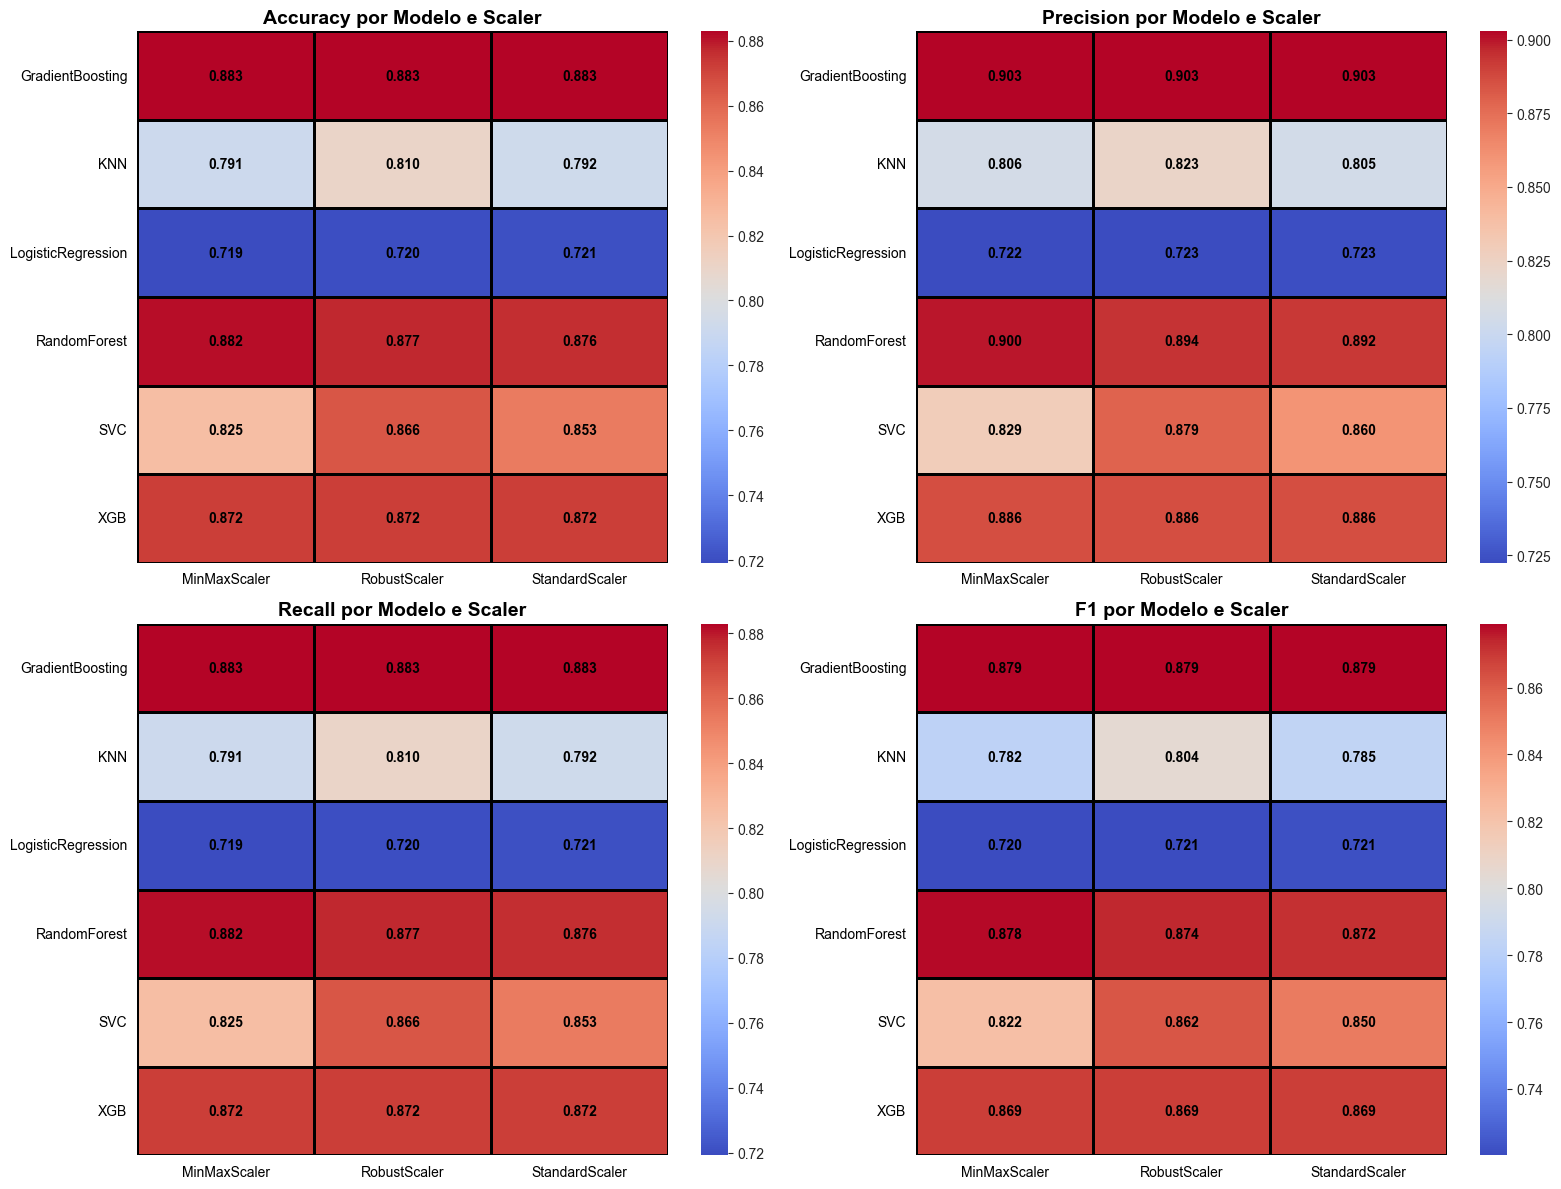

In [90]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    pivot = results_df.pivot(index="Model", columns="Scaler", values=metric)
    
    sns.heatmap(
        pivot, annot=True, fmt=".3f", cmap="coolwarm", cbar=True,
        linewidths=0.8, linecolor='black', ax=axes[i], annot_kws={"size":10, "weight":"bold", "color":"black"}  
    )
    
    axes[i].set_title(f"{metric} por Modelo e Scaler", fontsize=14, color='black', weight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].tick_params(colors='black', labelsize=10)

plt.tight_layout()
plt.show()

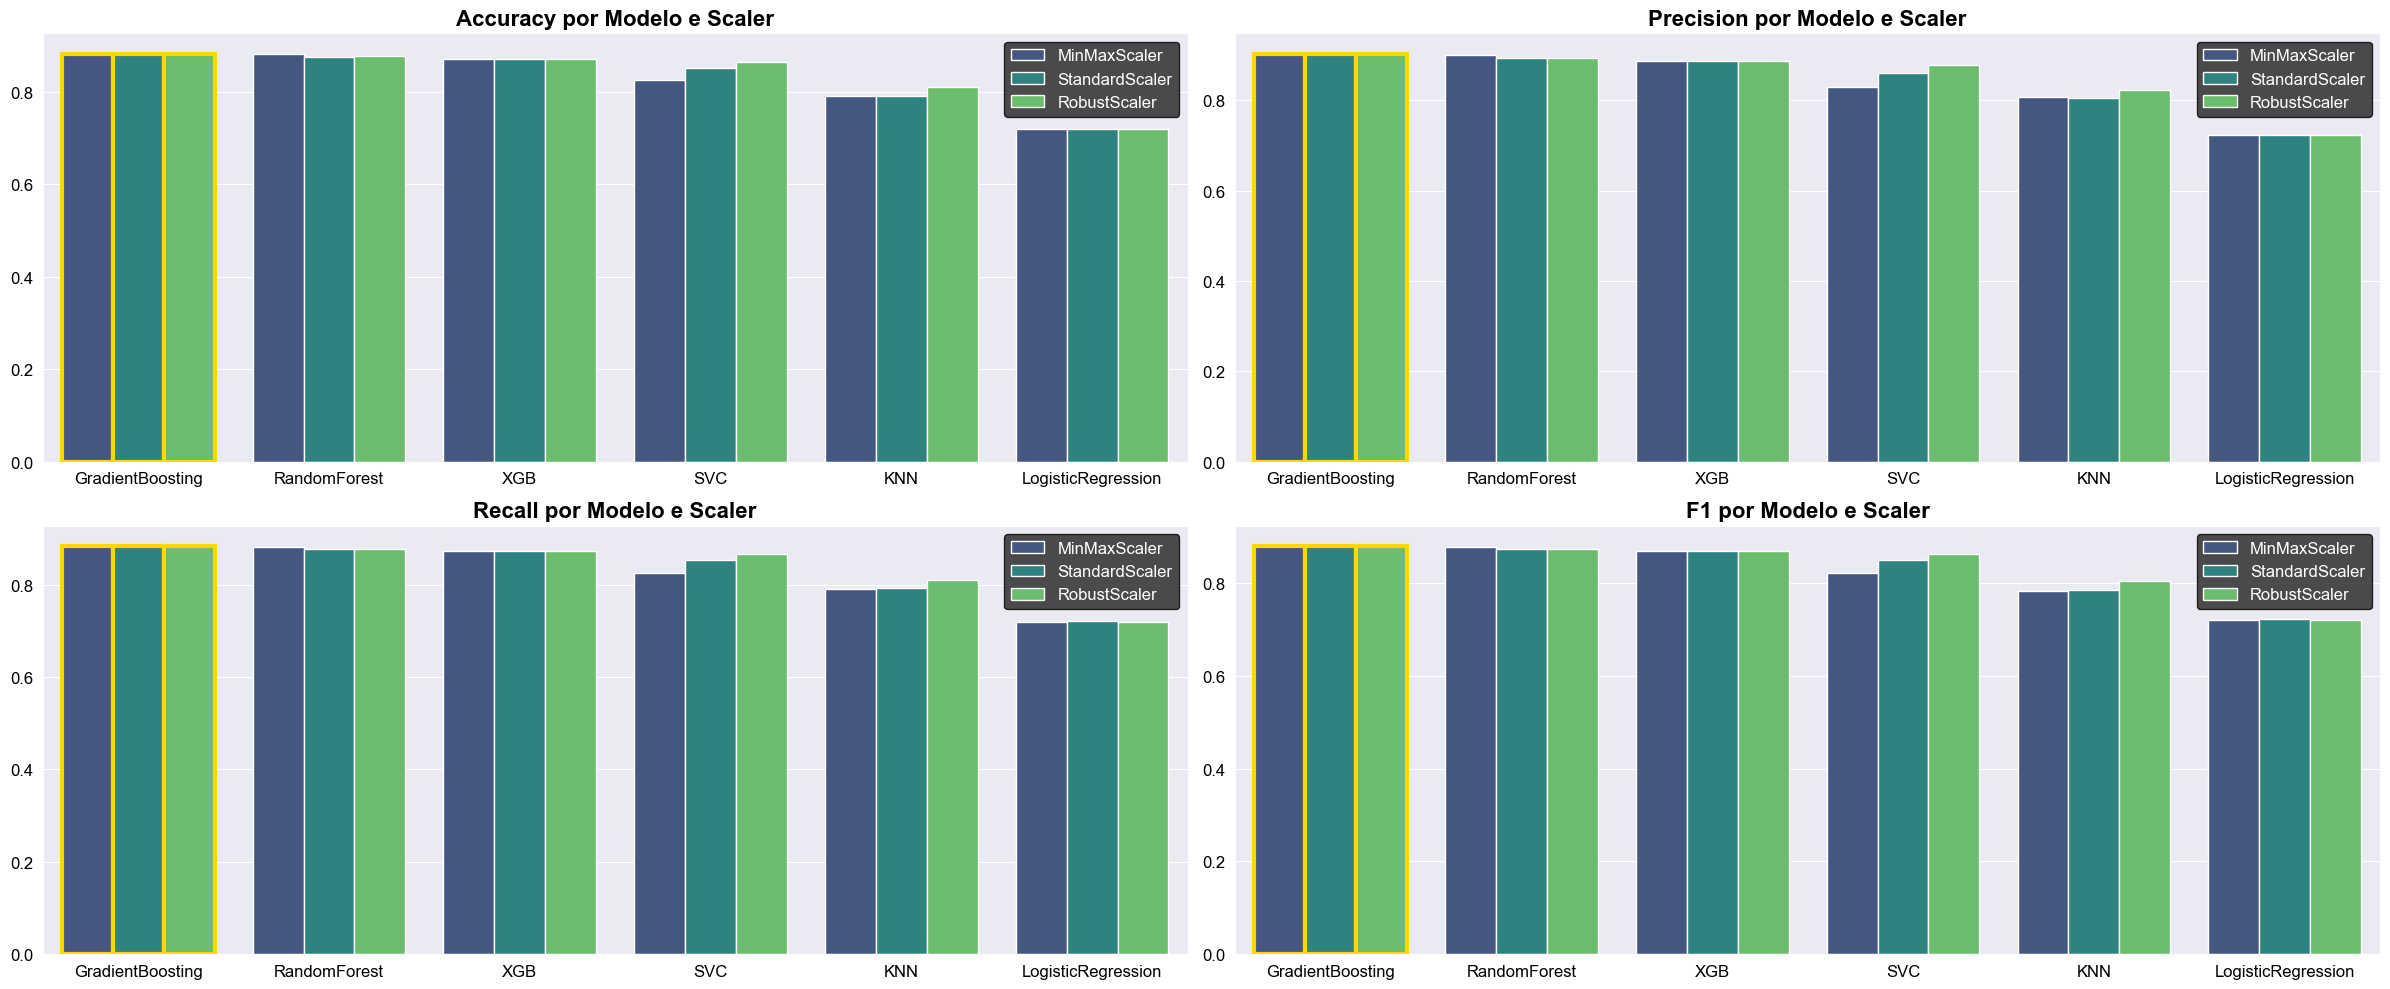

In [91]:
fig, axes = plt.subplots(2, 2, figsize=(24, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(data=results_df, x='Model', y=metric, hue='Scaler', ax=ax, palette="viridis")
    
    max_val = results_df[metric].max()
    for p in ax.patches:
        if p.get_height() == max_val:
            p.set_edgecolor('gold')
            p.set_linewidth(3)
    
    ax.set_title(f"{metric} por Modelo e Scaler", fontsize=16, color='black', weight='bold')
    ax.set_xlabel("")
    ax.set_ylabel("")

    ax.tick_params(axis='x', rotation=0, colors='black', labelsize=12)
    ax.tick_params(axis='y', colors='black', labelsize=12)
    
    leg = ax.legend(title='', loc='best', facecolor='#222222', edgecolor='black', fontsize=12, title_fontsize=13)
    for text in leg.get_texts():
        text.set_color("white")

plt.tight_layout()
plt.show()

In [96]:
scoring_metric = 'f1_weighted'

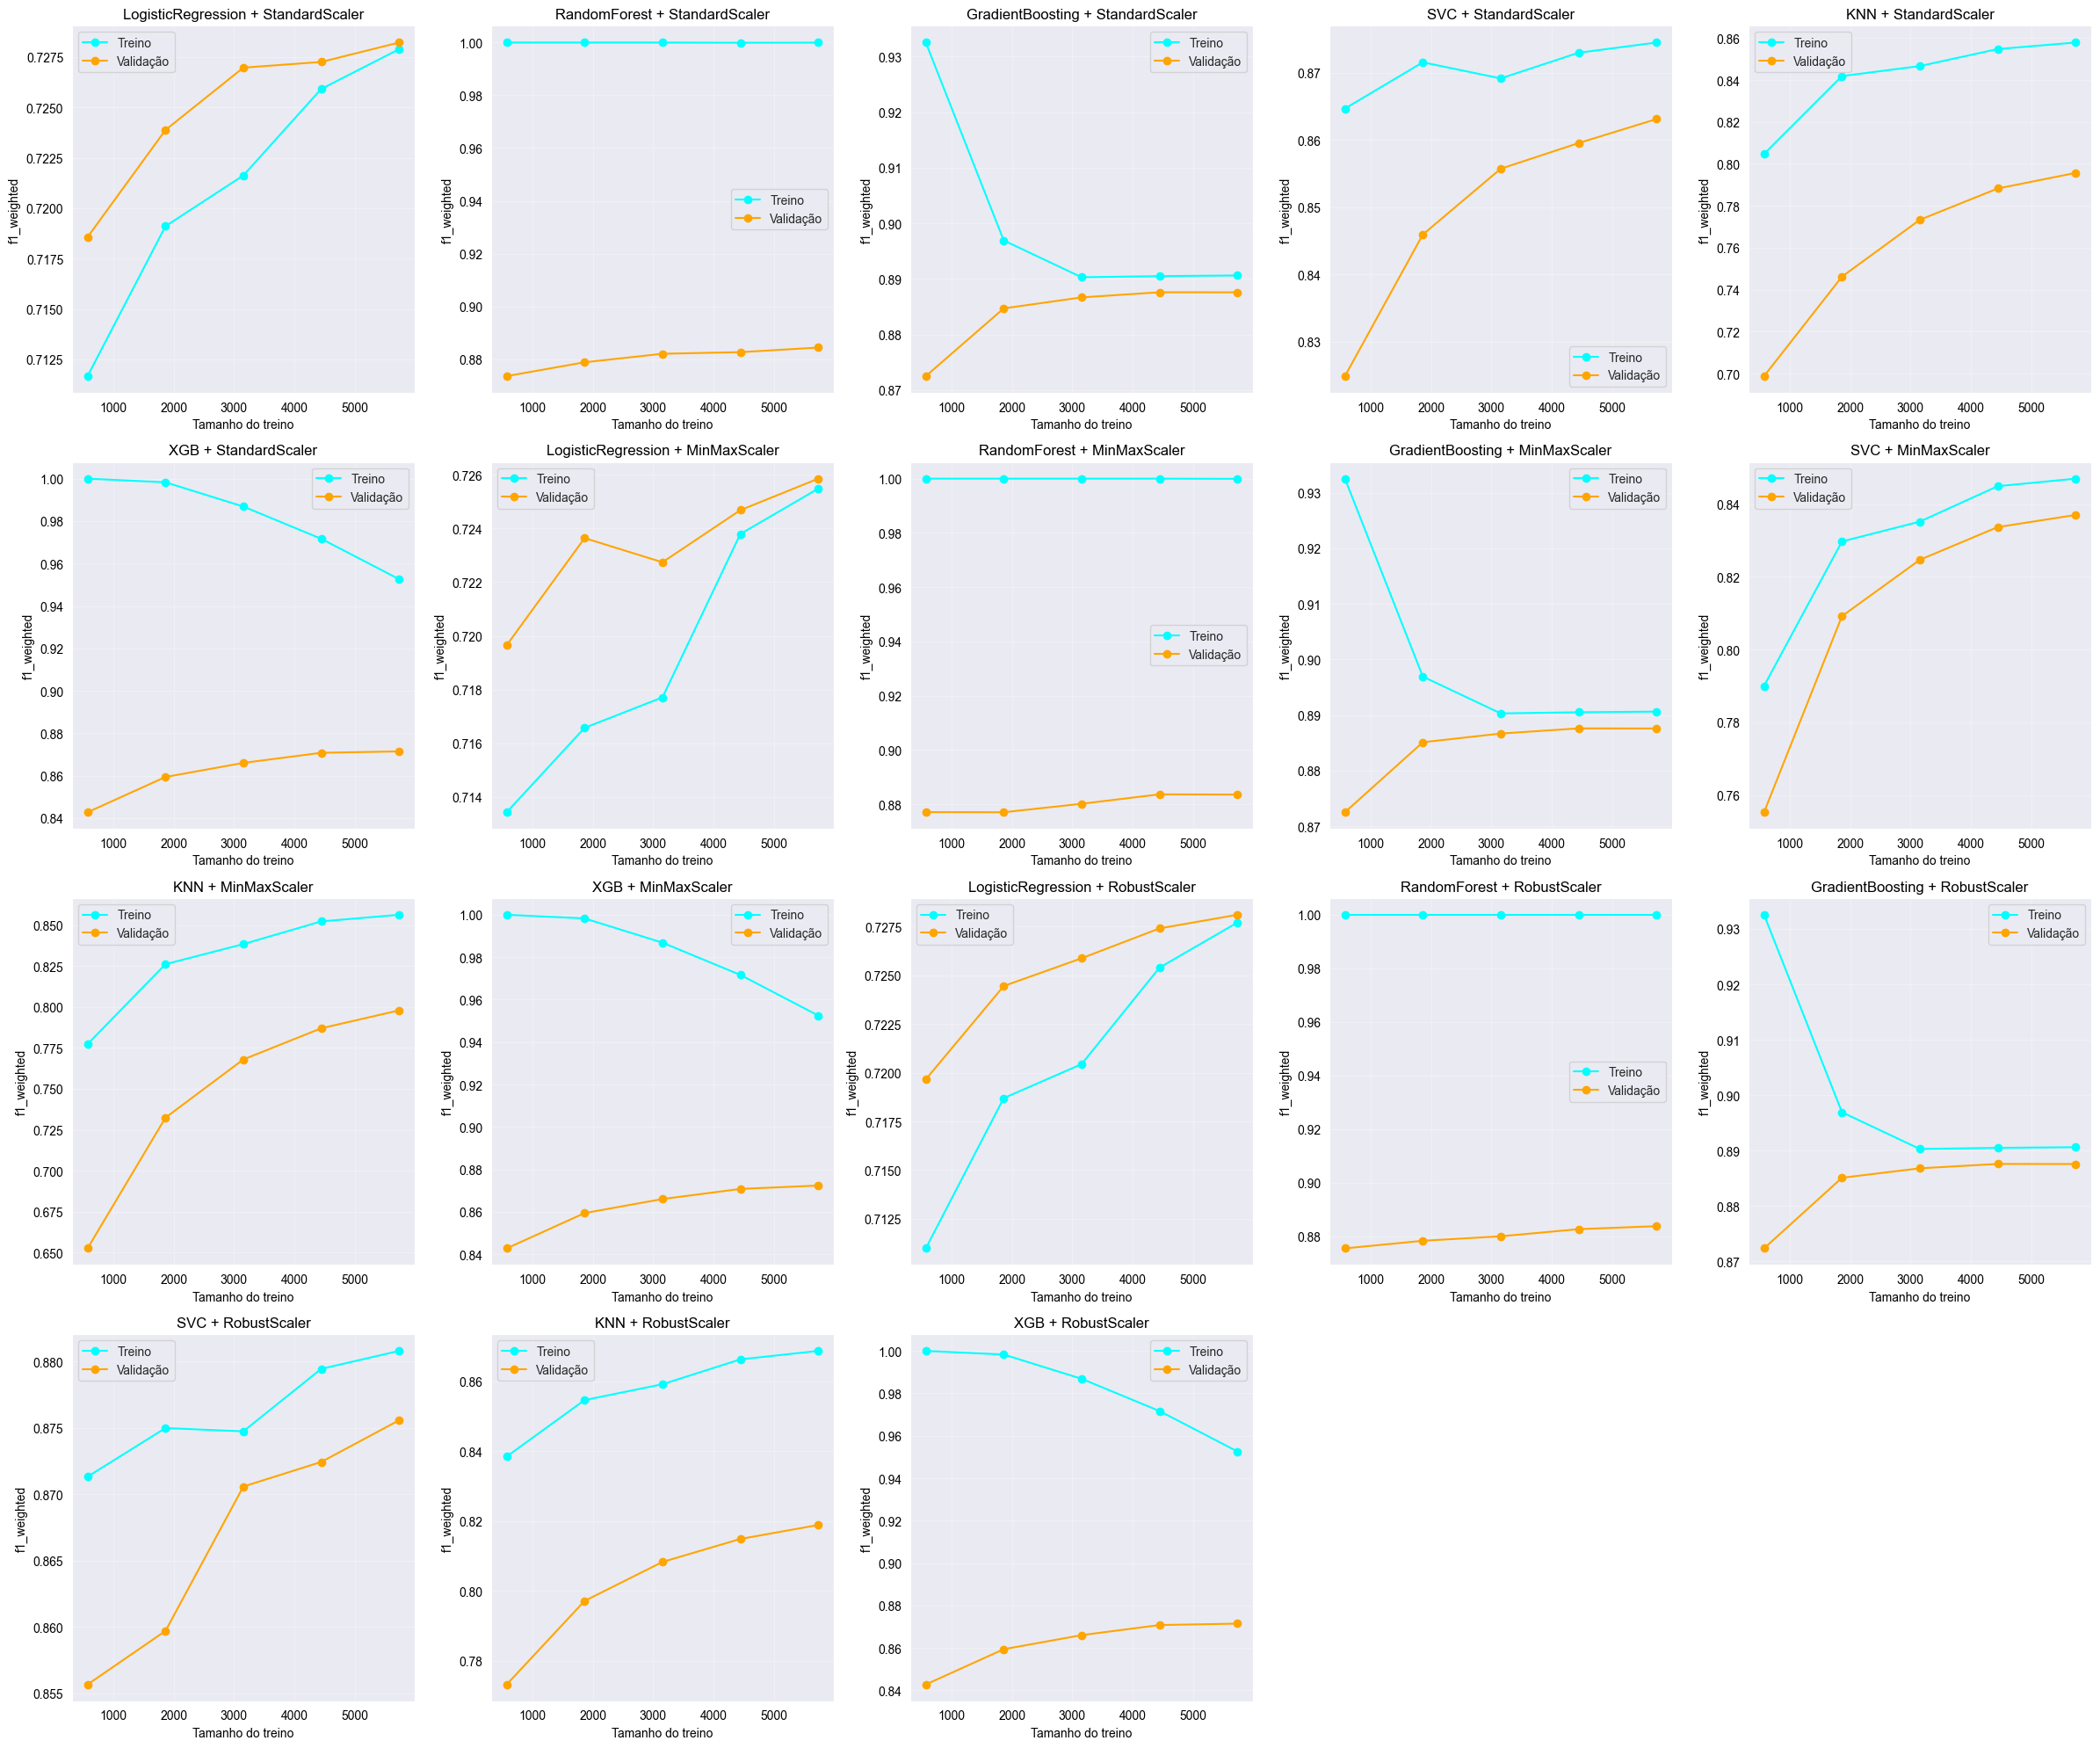

In [99]:
total_plots = len(scalers) * len(models)
cols = 5
rows = math.ceil(total_plots / cols)

fig, axes = plt.subplots(rows, cols, figsize=(24, 5*rows))
axes = axes.flatten()

plot_idx = 0

for scaler_name, scaler in scalers.items():
    for model_name, model in models.items():
        pipeline = Pipeline([('scaler', scaler), ('model', model)])
        
        train_sizes, train_scores, test_scores = learning_curve(
            pipeline, X, y, cv=5, scoring=scoring_metric, train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
        )
        
        train_mean = train_scores.mean(axis=1)
        test_mean = test_scores.mean(axis=1)
        
        ax = axes[plot_idx]
        ax.plot(train_sizes, train_mean, 'o-', color='cyan', label='Treino')
        ax.plot(train_sizes, test_mean, 'o-', color='orange', label='Validação')
        ax.set_title(f"{model_name} + {scaler_name}", fontsize=12, color='black')
        ax.set_xlabel("Tamanho do treino", color='black')
        ax.set_ylabel(f"{scoring_metric}", color='black')
        ax.tick_params(colors='black')
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        plot_idx += 1

for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()